## Фонин Максим Алексеевич, ИУ5-25М

## Лабораторная работа №2: Обработка признаков (часть 1)»

**Цель работы**

Изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

**Задание**

- Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  * устранение пропусков в данных;
  * кодирование категориальных признаков;
  * нормализация числовых признаков.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Загрузка датасета по инструкции kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "cleaned_nutrition_dataset_per100g.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "tharunmss/nutritional-breakdown-of-foods",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
df.shape

<ipython-input-3-eb5a0f91d343>:13: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


(3454, 13)

In [ ]:
df.head(10)

,Vitamin C (mg per 100g),Vitamin B11 (mg per 100g),Sodium (mg per 100g),Calcium (mg per 100g),Carbohydrates (g per 100g),food,Iron (mg per 100g),Calories (kcal per 100g),Sugars (g per 100g),Dietary Fiber (g per 100g),Fat (g per 100g),Protein (g per 100g),food_normalized
0,0.082,0.086,0.018,2.8,0.073,margarine with yoghurt,0.027,88.0,0.0,0.0,9.8,0.058,margarine with yoghurt
1,0.400,0.005,0.065,10.2,3.700,sunflower seed butter,0.700,99.0,1.7,0.9,8.8,2.800,sunflower seed butter
2,0.000,0.000,0.000,0.0,0.000,hazelnut oil,0.000,120.0,0.0,0.0,13.6,0.000,hazelnut oil
3,0.000,0.000,0.000,0.0,0.000,menhaden fish oil,0.000,1966.0,0.0,0.0,218.0,0.000,menhaden fish oil
4,0.000,0.000,0.000,0.0,0.000,cod liver fish oil,0.000,123.0,0.0,0.0,13.6,0.000,cod liver fish oil
5,0.000,0.000,0.000,0.0,0.000,sardine oil,0.000,123.0,0.0,0.0,13.6,0.000,sardine oil
6,0.000,0.000,0.000,0.0,0.000,cupu assu oil,0.000,120.0,0.0,0.0,13.6,0.000,cupu assu oil
7,0.000,0.000,0.000,0.0,0.000,lard,0.000,115.0,0.0,0.0,12.8,0.000,lard
8,0.000,0.002,0.031,153.6,3.800,sesame butter,3.100,94.0,0.0,0.9,8.1,2.900,sesame butter
9,0.000,0.067,0.019,0.6,0.100,margarine spread,0.078,59.0,0.0,0.0,6.7,0.082,margarine spread


In [ ]:
# Проверка структуры
print(df.info())
print("\nПропуски:\n", df.isnull().sum())
print("\nКатегориальные признаки:\n", df.select_dtypes(include='object').nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Vitamin C (mg per 100g)     3454 non-null   float64
 1   Vitamin B11 (mg per 100g)   3454 non-null   float64
 2   Sodium (mg per 100g)        3454 non-null   float64
 3   Calcium (mg per 100g)       3454 non-null   float64
 4   Carbohydrates (g per 100g)  3454 non-null   float64
 5   food                        3454 non-null   object 
 6   Iron (mg per 100g)          3454 non-null   float64
 7   Calories (kcal per 100g)    3454 non-null   float64
 8   Sugars (g per 100g)         3454 non-null   float64
 9   Dietary Fiber (g per 100g)  3454 non-null   float64
 10  Fat (g per 100g)            3454 non-null   float64
 11  Protein (g per 100g)        3454 non-null   float64
 12  food_normalized             3454 non-null   object 
dtypes: float64(11), object(2)
memory 

In [ ]:
# Создание категориального признака на основе калорий
df['calorie_level'] = pd.cut(df['Calories (kcal per 100g)'],
                             bins=[0, 100, 200, df['Calories (kcal per 100g)'].max()],
                             labels=['low', 'medium', 'high'])

,Vitamin C (mg per 100g),Vitamin B11 (mg per 100g),Sodium (mg per 100g),Calcium (mg per 100g),Carbohydrates (g per 100g),food,Iron (mg per 100g),Calories (kcal per 100g),Sugars (g per 100g),Dietary Fiber (g per 100g),Fat (g per 100g),Protein (g per 100g),food_normalized,calorie_level
0,0.082,0.086,0.018,2.8,0.073,margarine with yoghurt,0.027,88.0,0.0,0.0,9.8,0.058,margarine with yoghurt,low
1,0.400,0.005,0.065,10.2,3.700,sunflower seed butter,0.700,99.0,1.7,0.9,8.8,2.800,sunflower seed butter,low
2,0.000,0.000,0.000,0.0,0.000,hazelnut oil,0.000,120.0,0.0,0.0,13.6,0.000,hazelnut oil,medium
3,0.000,0.000,0.000,0.0,0.000,menhaden fish oil,0.000,1966.0,0.0,0.0,218.0,0.000,menhaden fish oil,high
4,0.000,0.000,0.000,0.0,0.000,cod liver fish oil,0.000,123.0,0.0,0.0,13.6,0.000,cod liver fish oil,medium
5,0.000,0.000,0.000,0.0,0.000,sardine oil,0.000,123.0,0.0,0.0,13.6,0.000,sardine oil,medium
6,0.000,0.000,0.000,0.0,0.000,cupu assu oil,0.000,120.0,0.0,0.0,13.6,0.000,cupu assu oil,medium
7,0.000,0.000,0.000,0.0,0.000,lard,0.000,115.0,0.0,0.0,12.8,0.000,lard,medium
8,0.000,0.002,0.031,153.6,3.800,sesame butter,3.100,94.0,0.0,0.9,8.1,2.900,sesame butter,low
9,0.000,0.067,0.019,0.6,0.100,margarine spread,0.078,59.0,0.0,0.0,6.7,0.082,margarine spread,low


In [ ]:
df.head(10)

,Vitamin C (mg per 100g),Vitamin B11 (mg per 100g),Sodium (mg per 100g),Calcium (mg per 100g),Carbohydrates (g per 100g),food,Iron (mg per 100g),Calories (kcal per 100g),Sugars (g per 100g),Dietary Fiber (g per 100g),Fat (g per 100g),Protein (g per 100g),food_normalized,calorie_level
0,0.082,0.086,0.018,2.8,0.073,margarine with yoghurt,0.027,88.0,0.0,0.0,9.8,0.058,margarine with yoghurt,low
1,0.400,0.005,0.065,10.2,3.700,sunflower seed butter,0.700,99.0,1.7,0.9,8.8,2.800,sunflower seed butter,low
2,0.000,0.000,0.000,0.0,0.000,hazelnut oil,0.000,120.0,0.0,0.0,13.6,0.000,hazelnut oil,medium
3,0.000,0.000,0.000,0.0,0.000,menhaden fish oil,0.000,1966.0,0.0,0.0,218.0,0.000,menhaden fish oil,high
4,0.000,0.000,0.000,0.0,0.000,cod liver fish oil,0.000,123.0,0.0,0.0,13.6,0.000,cod liver fish oil,medium
5,0.000,0.000,0.000,0.0,0.000,sardine oil,0.000,123.0,0.0,0.0,13.6,0.000,sardine oil,medium
6,0.000,0.000,0.000,0.0,0.000,cupu assu oil,0.000,120.0,0.0,0.0,13.6,0.000,cupu assu oil,medium
7,0.000,0.000,0.000,0.0,0.000,lard,0.000,115.0,0.0,0.0,12.8,0.000,lard,medium
8,0.000,0.002,0.031,153.6,3.800,sesame butter,3.100,94.0,0.0,0.9,8.1,2.900,sesame butter,low
9,0.000,0.067,0.019,0.6,0.100,margarine spread,0.078,59.0,0.0,0.0,6.7,0.082,margarine spread,low


In [ ]:
# Случайно обнулим 10% значений в колонке 'Sugars (g per 100g)'
df.loc[df.sample(frac=0.1).index, 'Sugars (g per 100g)'] = np.nan

In [ ]:
df['Sugars (g per 100g)'].isnull().sum()

np.int64(345)

In [ ]:
df['Sugars (g per 100g)'] = df['Sugars (g per 100g)'].fillna(df['Sugars (g per 100g)'].median())

In [ ]:
df['Sugars (g per 100g)'].isnull().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['calorie_level_le'] = le.fit_transform(df['calorie_level'])

In [ ]:
from sklearn.preprocessing import RobustScaler

# Инициализация scaler
scaler = RobustScaler()

df['Fat (g per 100g) Scaled'] = scaler.fit_transform(df[['Fat (g per 100g)']])

# Проверка результата
print(df[['Fat (g per 100g)', 'Fat (g per 100g) Scaled']].describe())

       Fat (g per 100g)  Fat (g per 100g) Scaled
count       3454.000000             3.454000e+03
mean          12.006807             6.584839e-01
std           26.726515             2.227210e+00
min            0.000000            -3.420833e-01
25%            0.500000            -3.004167e-01
50%            4.105000            -3.702550e-17
75%           12.500000             6.995833e-01
max          550.700000             4.554958e+01


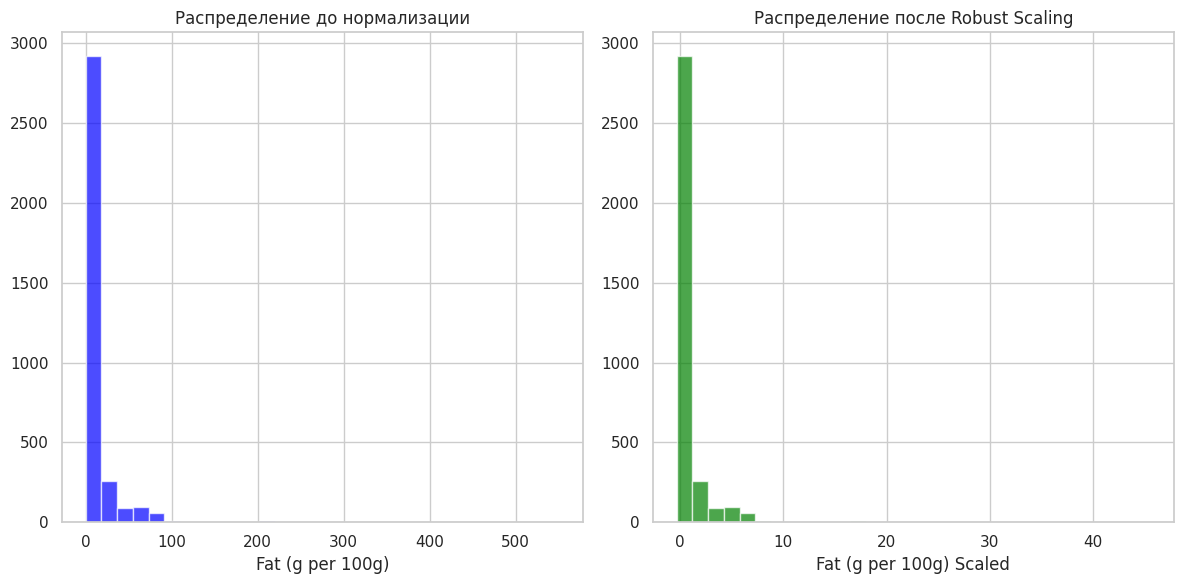

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# До обработки
plt.subplot(1, 2, 1)
plt.hist(df['Fat (g per 100g)'], bins=30, color='blue', alpha=0.7)
plt.title('Распределение до нормализации')
plt.xlabel('Fat (g per 100g)')

# После обработки
plt.subplot(1, 2, 2)
plt.hist(df['Fat (g per 100g) Scaled'], bins=30, color='green', alpha=0.7)
plt.title('Распределение после Robust Scaling')
plt.xlabel('Fat (g per 100g) Scaled')

plt.tight_layout()
plt.show()